# Physics 300 
## Computational Physics I (Fall 2018)
## BPB-248, Mon/Wed 02:30 - 03:45 pm 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Mon/Wed 03:45 - 05:00 pm |


# 12 Monte Carlo

We have introduced the Monte Carlo methods in the last lecture. It is not a very good one for doing integrals.
There are significantly better ways to perform the calculation, the most common of which is the _mean value method_.

## 12.1 The Mean value method

Let's take a general integration problem: 

$$ I = \int_a^b f(x)dx $$

The average value of $f(x)$ in the range from $a$ to $b$ is by definition

$$ <f> = \frac{1}{b-a}\int_a^b f(x)dx = \frac{I}{b-a} $$

Thus

$$ I = (b-a)<f> $$

If we can estimate <f> then we can estimate $I$. A simple way to estimate <f> is just to measure $f(x)$
at $N$ points $x_1, x_2 .... x_N$ chosen uniformly at random between $a$ and $b$, and then calculate
$<f> \approx N^{-1} \sum^N_{i=1} f(x_i)$,  

$$ I \approx \frac{b-a}{N} \sum^N_{i=1} f(x_i)$$

This is the fundamental formula for the mean value method. As with the previous method, it gives only an approximate
estimate of the integral. How accurate is it? We can estimate the error using standard results for the behavior
of random variable which tell us that the variance on the sum of $N$ independent random numbers - no matter what
their distribution - is equal to $N$ times the variance on a single one.

$$ f = <f^2> - <f>^2 $$
in which
$$ <f> = \frac{1}{N} \sum_{i=1}^N f(x_i)$$
$$ <f^2> = \frac{1}{N} \sum_{i=1}^N [f(x_i)]^2$$

Then the variance on the sum is $N$ times the variance on a single term. Finally, we get the standard deviation on $I$,

$$ \sigma = \frac{b-a}{N} \frac{\sqrt{\text{var}f}} {\sqrt{N}} $$

Thus, the errors goes as 1/$\sqrt{N}$. However, the leading constant is smaller, which means the method is always
more accurate than the previous method.


In [1]:
# MC intergral
import matplotlib.pyplot as plt
from math import sin
from random import random

def f(x):
    return sin(1/x/(2-x))**2

def MC1(N):
    count = 0
    for i in range(N):
        x = 2*random()
        y = random()
        if y<f(x):
            count += 1
    I = 2*count/N
    return I


def MC2(N):
    I = 0
    for i in range(N):
        x = 2*random()
        I += f(x)

    return I/N*2

In [2]:
print(MC1(1000))
print(MC2(1000))

1.472
1.4606935724606758


## 12.2 Integrals in high dimensions

In addition to the intergration of pathological functions, Monte Carlo integration is used for performing
high dimensional integrals. As we saw in the previous section, performing an integral over two variables
by standard grid of points such as trapezoidal rule requires us to take samples on a two-dimensional grid.
If we have an integral over four dimensions or even higher, then the number of points on the grid can 
become very slow and impractical. Instead, Monte Carlo in high dimension is an obvious extension of the 
technique in one dimension. The integral of a function $f(r)$ over a volume $V$ in a high-dimensional space
is given by the generalization:

$$ I = \frac{V}{N} \sum_{i=1}^{N}f(r_i)$$

where the points $r$ are picked uniformly at random from the volume $V$.

An important application of this type of integral is in financial mathematics. This is widely used for 
predicting the values of stocks, which requires the evaluation of integrals over many variables. Such
information could be used to instruct the quick trading decisions. This is why stastical physicists
were popular in Wall Street!

## 12.3 Importance sampling

Monte Carlo is useful for integrating pathological functions. However, it is still not good for some cases. 
In particular, it gives problems if the function contains a divergence. For example,

$$ I = \int_0 ^1 \frac{x^{-1/2}}{e^x + 1} dx $$

/Users/qiangzhu/.pyenv/versions/3.7.0/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


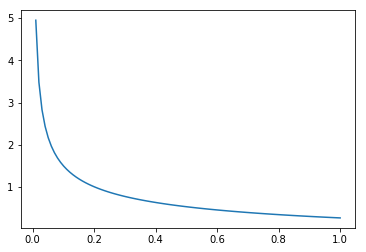

In [9]:
%matplotlib inline  

# Divergence problem
import matplotlib.pyplot as plt
import numpy as np
from math import pi


def f(x):
    return 1/np.sqrt(x)/(np.exp(x)+1)

x = np.linspace(0,1,100)
plt.plot(x, f(x))
plt.show()

If you try to do it using the mean value method, you will run into problems becuase the value of f(x) diverges when x is approaching to 0. This means that the estimated integral could go up and down without convergence.

We can get around these problems by drawing our points x `non-uniformly`. This technique is called `importance sampling`. For any general functions $g(x)$ we can define a weighted average over the interval from $a$ to $b$ thus:

$$ \langle g \rangle_w = \frac{\int_a^b w(x)g(x)dx}{\int_a^b w(x)dx} $$

where $w(x)$ is any function we choose. Now consider the general 1d integral:

$$ I = \int_a^b f(x)dx $$

Setting g(x)=f(x)/w(x), we have
$$ 
\begin{aligned}
\bigg \langle \frac{f(x)}{w(x)} \bigg \rangle _w= & \frac{\int_a^b w(x)f(x)/w(x)dx}{\int_a^b w(x)dx} \\
                      = & \frac{\int_a^b f(x)dx}{\int_a^b w(x)dx}\\
                      = & \frac{I}{\int_a^b w(x)dx}
\end{aligned}
$$

So
$$ I = \bigg \langle \frac{f(x)}{w(x)} \bigg \rangle _w \int_a^b w(x)dx$$

This formula is similar to what we have for the mean value method. But it allows us to calculate the value
of the integral from a weighted average, rather than a standard uniform average. 

Now we need to solve the $\langle \frac{f(x)}{w(x)} \rangle _w$. Let's define a probability function

$$ p(x) = \frac{w(x)}{\int_a^b w(x)dx} $$

The average number of samples that fall in this interval is $Np(x)dx$, so for any function g(x)

$$\sum_{i=1}^Ng(x_i) \approx \int_a^b Np(x)g(x)dx$$

Using this result, we can now write the general weighted average of the function g(x) as

$$
\begin{aligned}
\langle g \rangle_w = &\frac{\int_a^b w(x)g(x)dx}{\int_a^b w(x)dx} \\ 
                    = &\int_a^b p(x)g(x)dx \\
              \approx & \frac{1}{N} \sum_{i=1}^N g(x_i)    
\end{aligned}
$$

We then get 

$$ I \approx  \frac{1}{N} \sum_{i=1}^{N} \frac{f(x_i)}{w(x_i)} \int_a^b w(x)dx$$

In order to calculate it, we need to get the `tranformation` from uniform $x$ to weighted $x_i$.

- Search for the weight founction $w(x)$
- find the probability function $p(x)$ and then the cumulative distribution function $F(x)$
- Inverse transform sampling to $F^{-1}(x)$
- averge $f(x)/w(x)$ in the points generated from $F^{-1}(x)$

## 12.4 Homework

- 1. Calculate a value for the integral

$$ I = \int_0 ^1 \frac{x^{-1/2}}{e^x + 1} dx $$

using the importance sampling method with $w(x) = x^{-1/2}$, with 1,000,000 random points.

- 2. Calculate a value for the integral

$$ I = \int_0 ^1 \frac{x^{-1}}{e^x + 1} dx $$

using the importance sampling method with $w(x) = 1/x$, with 1,000,000 random points.

/Users/qiangzhu/.pyenv/versions/3.7.0/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/qiangzhu/.pyenv/versions/3.7.0/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


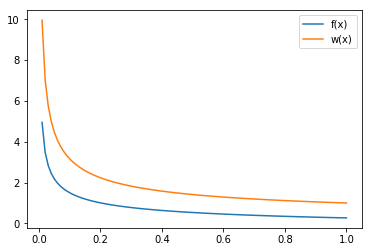

In [1]:
%matplotlib inline  

# Divergence problem
import matplotlib.pyplot as plt
import numpy as np
from math import pi


f = lambda x: 1/x/(np.exp(x)+1)
w = lambda x: 1/x
const = quad(w, 0, 1)[0]
p = lambda x: np.exp(const*x)

x = np.linspace(0,1,100)
plt.plot(x, f(x), label='f(x)')
plt.plot(x, w(x), label='w(x)')


plt.legend()
plt.show()

In [2]:
from scipy.integrate import quad
print('from scipy: ', quad(f, 0, 1)[0])


from scipy:  0.8389329600133838


In [3]:
from random import random 
f = lambda x: 1/np.sqrt(x)/(np.exp(x)+1)
w = lambda x: 1/np.sqrt(x)
p = lambda x: x**2

def IMC(N):
    const = quad(w, 0, 1)[0]
    I = 0
    for i in range(N):
        x = random()
        y = p(x)
        I += f(y)/w(y)
    return I/N*const

#print(IMC2(100))

In [4]:
def MC(N):
    I = 0
    for i in range(N):
        x = random()
        I += f(x)
    return I/N
#print(MC(100))

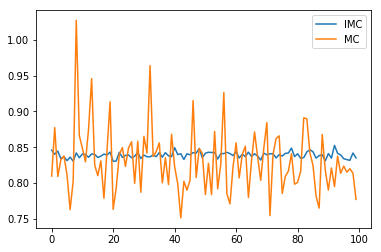

In [5]:
N = 1000
res_IMC = []
res_MC = []
for i in range(100):
    res_IMC.append(IMC(N))
    res_MC.append(MC(N))

plt.plot(res_IMC, label='IMC')
plt.plot(res_MC, label='MC')
plt.legend()